In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
from pandas import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("data/daily-revenue.csv", )
df.head()

Date     Revenue
0  January 1, 2018   439624.94
1  January 2, 2018  3252465.46
2  January 3, 2018  4764283.74
3  January 4, 2018  4482056.07
4  January 5, 2018  4110930.37

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
Date       424 non-null object
Revenue    424 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'] )


In [5]:
#startindex =  df['Date'][0]
#s = datetime.combine(startindex ,datetime.time(datetime.now()))
#s.strftime('%Y-%m-%d %H:%m')

In [6]:
# ## add time to date componenet as needed for ARIMA Model

# startindex =  df['Date']

# s=[]
# for i in range(len(startindex)):
#  s.append(datetime.combine(startindex[i] ,datetime.time(datetime.now())).strftime('%Y-%m-%d %H:%m'))
          
# df['DateTime'] = s

# df['DateTime'] = pd.to_datetime(df['DateTime'] )

# df.head()


In [8]:
df['Month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['dow']=df['Date'].dt.dayofweek
df.head()


Date     Revenue  Month  day  dow
0 2018-01-01   439624.94      1    1    0
1 2018-01-02  3252465.46      1    2    1
2 2018-01-03  4764283.74      1    3    2
3 2018-01-04  4482056.07      1    4    3
4 2018-01-05  4110930.37      1    5    4

In [9]:
func = [lambda x: 1 if x==5 or x==6 else 0]
df['weekend']=df['dow'].apply(func)
df.head()

Date     Revenue  Month  day  dow  weekend
0 2018-01-01   439624.94      1    1    0        0
1 2018-01-02  3252465.46      1    2    1        0
2 2018-01-03  4764283.74      1    3    2        0
3 2018-01-04  4482056.07      1    4    3        0
4 2018-01-05  4110930.37      1    5    4        0

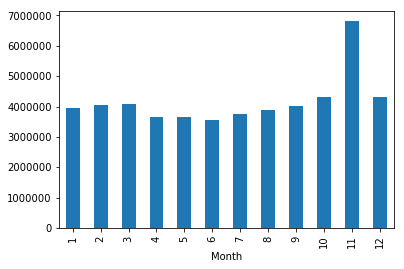

In [10]:
df.groupby('Month')['Revenue'].mean().plot.bar()

## November month see the highest average revenue

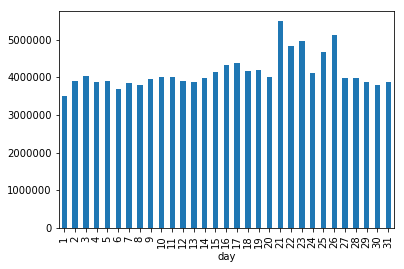

In [11]:
df.groupby('day')['Revenue'].mean().plot.bar()

## Days 21-26 observe highest average revenue

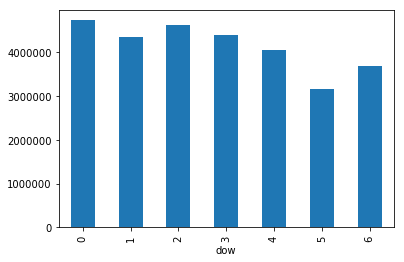

In [12]:
df.groupby('dow')['Revenue'].mean().plot.bar()

## Monday thru Wednesday sees higher revenue vs other days. 

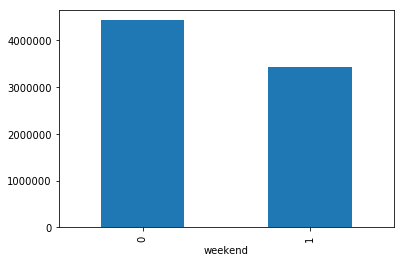

In [13]:
df.groupby('weekend')['Revenue'].mean().plot.bar()

## Weedays have higher revenue vs. Weekend

In [15]:
#df.index = df['Date']
df.index = df['Date']

df.drop(['Date'], axis=1,inplace=True)
df.head()

Revenue  Month  day  dow  weekend
Date                                            
2018-01-01   439624.94      1    1    0        0
2018-01-02  3252465.46      1    2    1        0
2018-01-03  4764283.74      1    3    2        0
2018-01-04  4482056.07      1    4    3        0
2018-01-05  4110930.37      1    5    4        0

## downsample

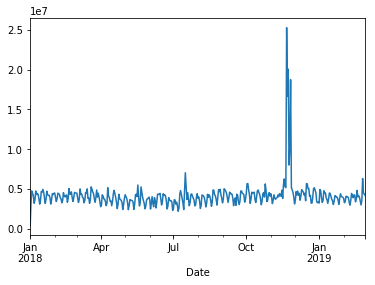

In [16]:
df['Revenue'].plot()

In [17]:
#df1 = df[df.index<'2018-11-01' ]
#df1['Revenue'].plot()

In [18]:
#df_weekly = df1['Revenue'].resample('W').mean()
#print (df_weekly.head())
#df_weekly.plot()

In [19]:
#df_weekly_sum = df1.resample('W').sum()
#print (df_weekly_sum.head())
#df_weekly_sum.plot()

## Naive Approach

In [20]:
df_weekly_df = pd.DataFrame(data= df.Revenue, index = df.index)
df_weekly_df.columns= ['Revenue']
df_weekly_df.head()

Revenue
Date                  
2018-01-01   439624.94
2018-01-02  3252465.46
2018-01-03  4764283.74
2018-01-04  4482056.07
2018-01-05  4110930.37

In [21]:
Train = df_weekly_df.ix[:'2018-10-07']
valid = df_weekly_df.ix['2018-10-07':]

print (Train.head())
print (valid.head())

               Revenue
Date                  
2018-01-01   439624.94
2018-01-02  3252465.46
2018-01-03  4764283.74
2018-01-04  4482056.07
2018-01-05  4110930.37
               Revenue
Date                  
2018-10-07  3770160.69
2018-10-08  4603710.10
2018-10-09  4467778.60
2018-10-10  4538756.06
2018-10-11  4603447.54


/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


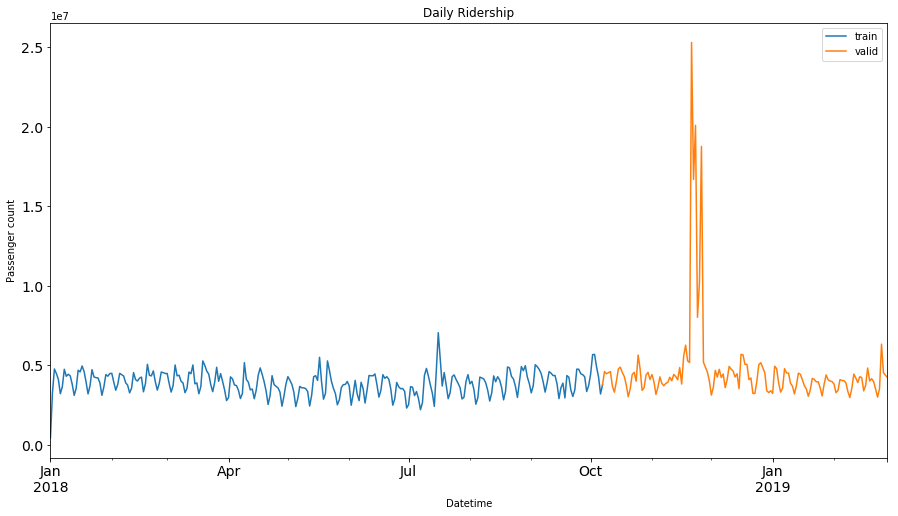

In [22]:
Train.Revenue.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Revenue.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count")
plt.legend(loc='best') 
plt.show()

In [23]:
import numpy as np

dd= np.asarray(Train['Revenue']) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 


In [24]:
y_hat

Revenue       naive
Date                              
2018-10-07  3770160.69  3770160.69
2018-10-08  4603710.10  3770160.69
2018-10-09  4467778.60  3770160.69
2018-10-10  4538756.06  3770160.69
2018-10-11  4603447.54  3770160.69
2018-10-12  3679589.44  3770160.69
2018-10-13  3307721.47  3770160.69
2018-10-14  3981674.74  3770160.69
2018-10-15  4766800.57  3770160.69
2018-10-16  4882360.27  3770160.69
2018-10-17  4544236.43  3770160.69
2018-10-18  4295084.93  3770160.69
2018-10-19  3763343.90  3770160.69
2018-10-20  3022596.62  3770160.69
2018-10-21  3522649.78  3770160.69
2018-10-22  4413966.71  3770160.69
2018-10-23  4555952.26  3770160.69
2018-10-24  3998100.20  3770160.69
2018-10-25  5642767.35  3770160.69
2018-10-26  4771682.46  3770160.69
2018-10-27  3423759.80  3770160.69
2018-10-28  3579636.48  3770160.69
2018-10-29  4388476.01  3770160.69
2018-10-30  4552180.47  3770160.69
2018-10-31  4107060.55  3770160.69
2018-11-01  4413606.71  3770160.69
2018-11-02  3958945.47  3770160.69
2018-11-03  3167626.67  3770160.69
2018-11-04  3615195.94  3770160.69
2018-11-05  4269920.73  3770160.69
...                ...         ...
2019-01-30  4007450.43  3770160.69
2019-01-31  3975353.83  3770160.69
2019-02-01  3822403.77  3770160.69
2019-02-02  3276097.43  3770160.69
2019-02-03  3419812.86  3770160.69
2019-02-04  4096704.38  3770160.69
2019-02-05  4043969.44  3770160.69
2019-02-06  4032326.03  3770160.69
2019-02-07  3893537.10  3770160.69
2019-02-08  3350922.91  3770160.69
2019-02-09  2971522.39  3770160.69
2019-02-10  3551608.12  3770160.69
2019-02-11  4443940.33  3770160.69
2019-02-12  4203820.46  3770160.69
2019-02-13  3908903.65  3770160.69
2019-02-14  4279799.98  3770160.69
2019-02-15  4224381.16  3770160.69
2019-02-16  3390475.76  3770160.69
2019-02-17  3753112.49  3770160.69
2019-02-18  4826723.50  3770160.69
2019-02-19  4013630.19  3770160.69
2019-02-20  4155299.76  3770160.69
2019-02-21  3974829.11  3770160.69
2019-02-22  3508242.28  3770160.69
2019-02-23  3000538.29  3770160.69
2019-02-24  3528257.00  3770160.69
2019-02-25  6327663.32  3770160.69
2019-02-26  4520398.17  3770160.69
2019-02-27  4368989.79  3770160.69
2019-02-28  4219074.94  3770160.69

[145 rows x 2 columns]

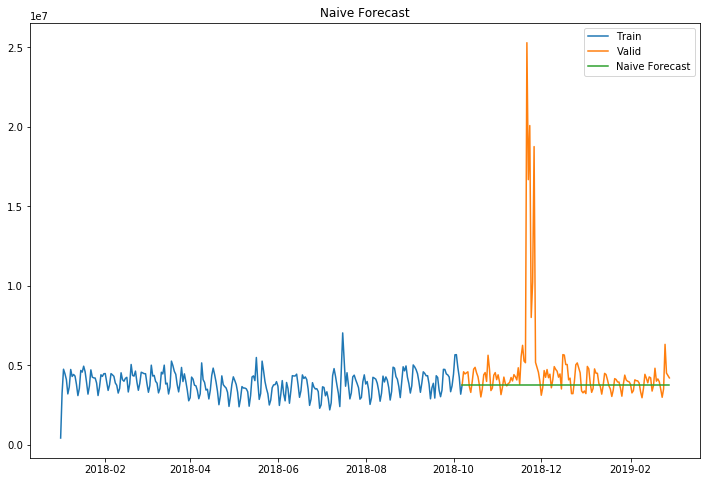

In [25]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train.Revenue, label='Train') 
plt.plot(valid.index,valid.Revenue, label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Revenue, y_hat.naive)) 
print(rms)

2947897.488295114


## Moving Average

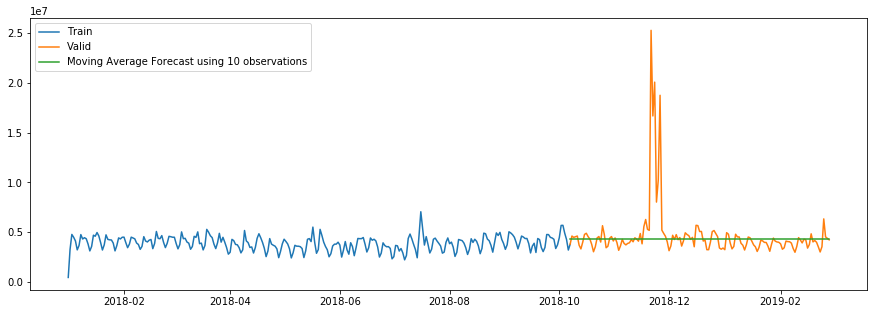

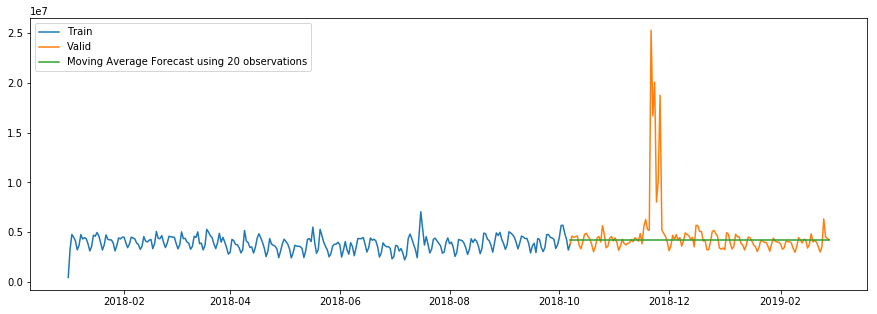

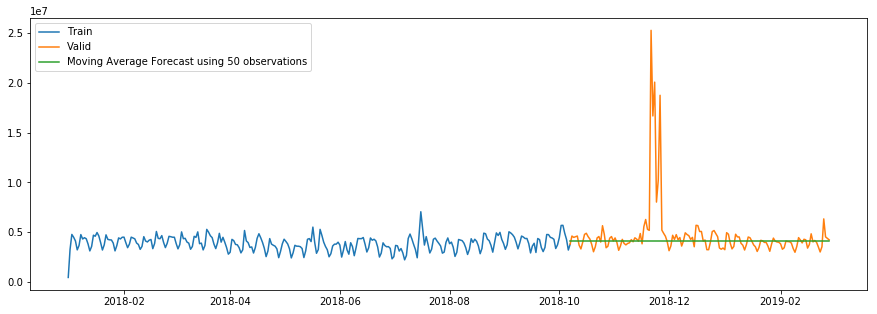

In [27]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

## using 10 observation predicted value closer to mean


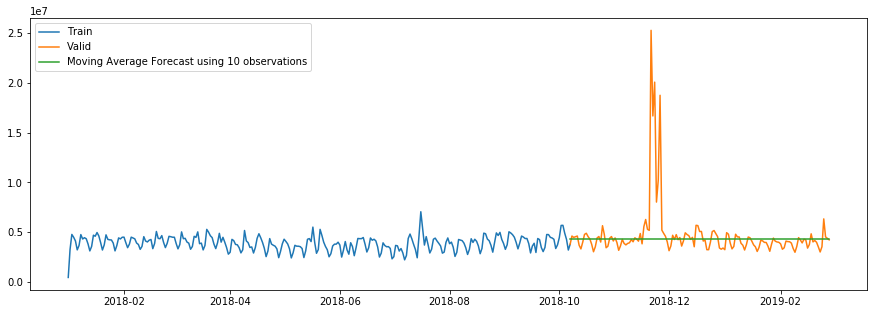

2829680.5687692277


In [28]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Revenue'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

# model evaluation
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.moving_avg_forecast)) 
print(rms)


In [29]:
# moving average

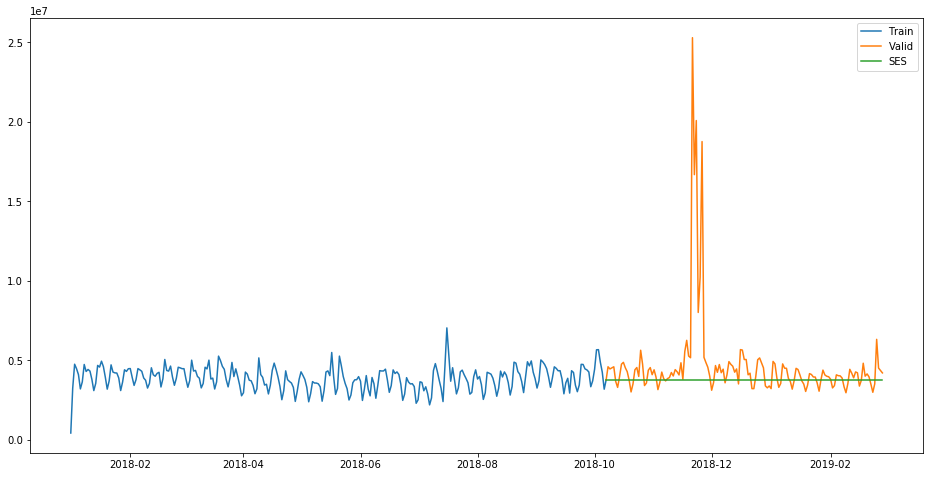

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Revenue'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [31]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.SES)) 
print(rms)

2949434.8000202556


## Holt's Linear Exponential 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424 entries, 2018-01-01 to 2019-02-28
Data columns (total 5 columns):
Revenue    424 non-null float64
Month      424 non-null int64
day        424 non-null int64
dow        424 non-null int64
weekend    424 non-null int64
dtypes: float64(1), int64(4)
memory usage: 39.9 KB


In [34]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280 entries, 2018-01-01 to 2018-10-07
Data columns (total 1 columns):
Revenue    280 non-null float64
dtypes: float64(1)
memory usage: 4.4 KB


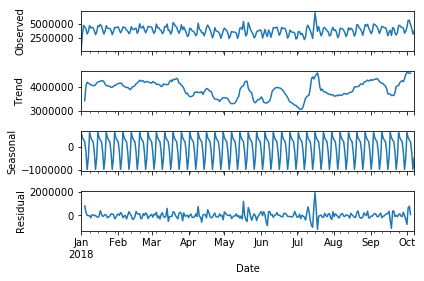

In [36]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Revenue).plot() 
result = sm.tsa.stattools.adfuller(Train.Revenue) 
plt.show()

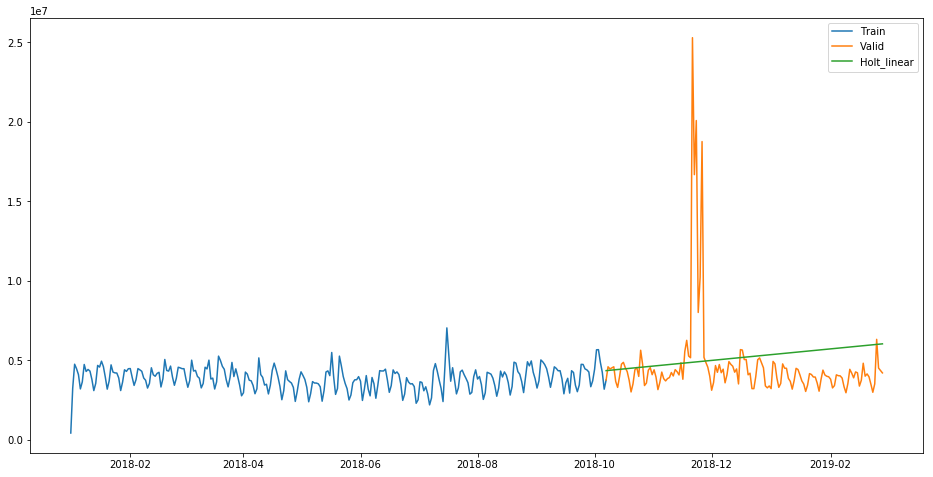

In [37]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Revenue'])).fit(smoothing_level = 0.2,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [38]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.Holt_linear)) 
print(rms)


2972584.6492803884


# holt winter

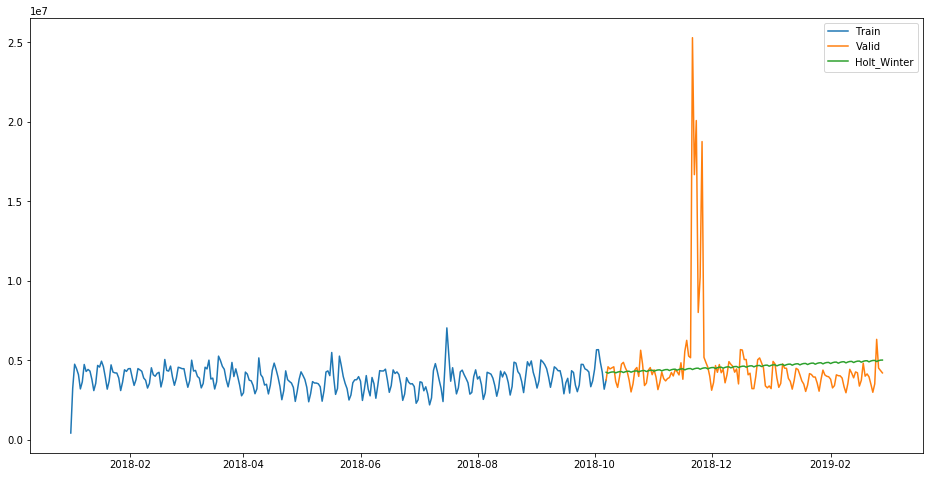

In [39]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Revenue']) ,seasonal_periods=4 ,trend='add', seasonal='mul',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Revenue'], label='Train') 
plt.plot(valid['Revenue'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [40]:
rms = sqrt(mean_squared_error(valid.Revenue, y_hat_avg.Holt_Winter)) 
print(rms)


2853645.3634793465


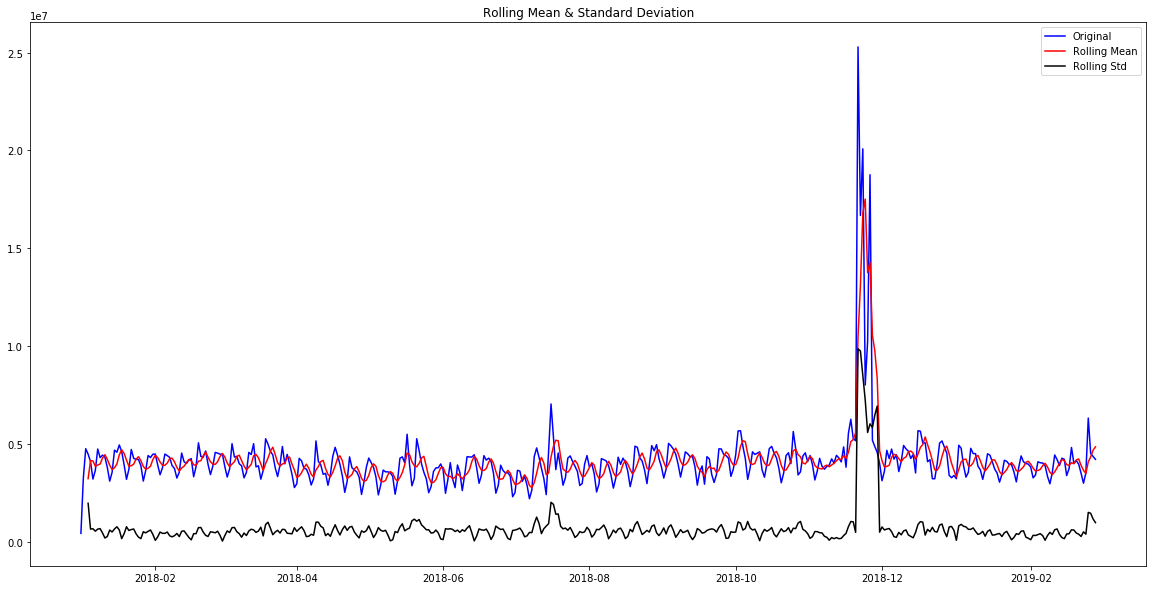

Results of Dickey-Fuller Test:
Test Statistic                  -4.490455
p-value                          0.000205
#Lags Used                      15.000000
Number of Observations Used    408.000000
Critical Value (1%)             -3.446480
Critical Value (5%)             -2.868650
Critical Value (10%)            -2.570557
dtype: float64


In [41]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean() # 24 hours on each day
    rolstd = timeseries.rolling(4).std() #, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(df['Revenue'])

Removing Trend
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.


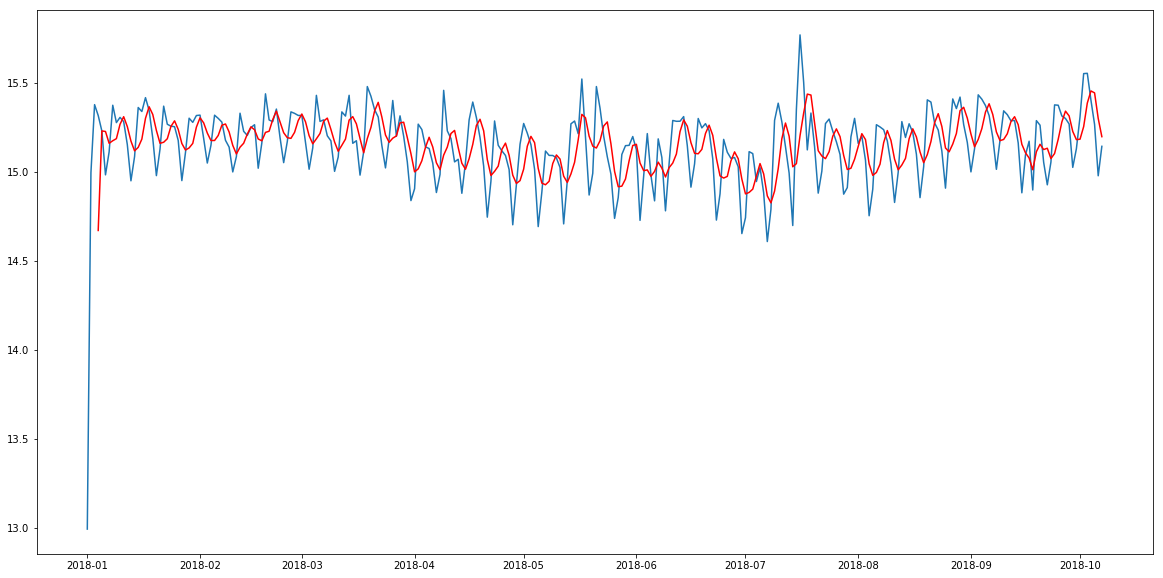

In [43]:

Train_log = np.log(Train['Revenue']) 
valid_log = np.log(valid['Revenue'])
moving_avg = Train_log.rolling(4).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [44]:
train_log_moving_avg_diff = Train_log - moving_avg

In [45]:
train_log_moving_avg_diff[train_log_moving_avg_diff.isna()]

Date
2018-01-01   NaN
2018-01-02   NaN
2018-01-03   NaN
Name: Revenue, dtype: float64

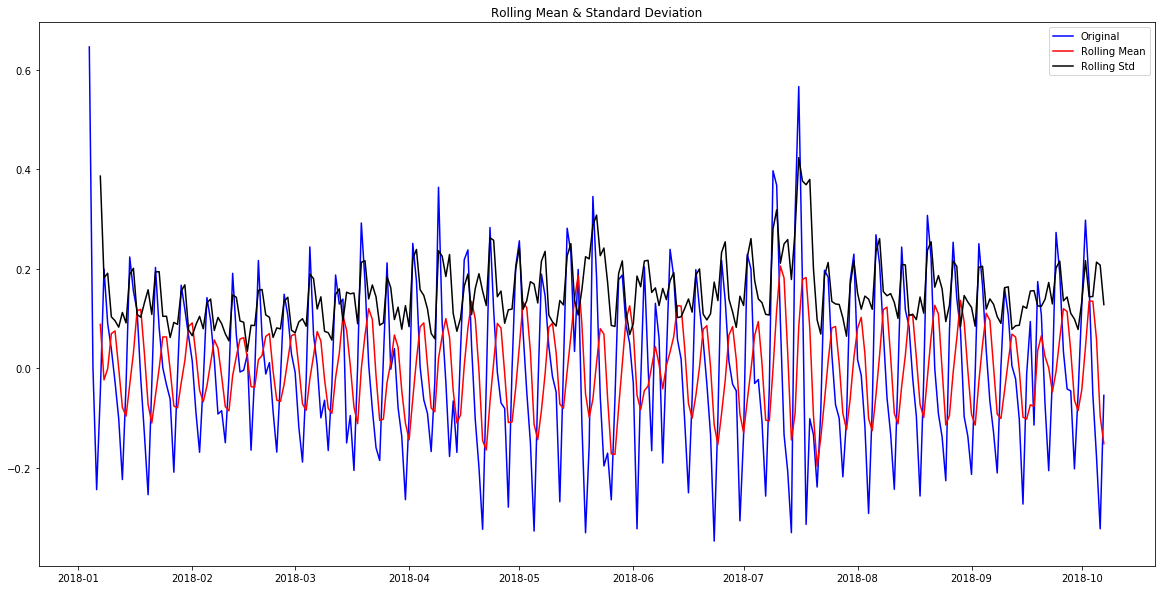

Results of Dickey-Fuller Test:
Test Statistic                -5.845610e+00
p-value                        3.689822e-07
#Lags Used                     1.400000e+01
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
Critical Value (10%)          -2.572683e+00
dtype: float64


In [46]:
## since rolling mean window is = 4 so average is not availabe for first 4 weeks
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

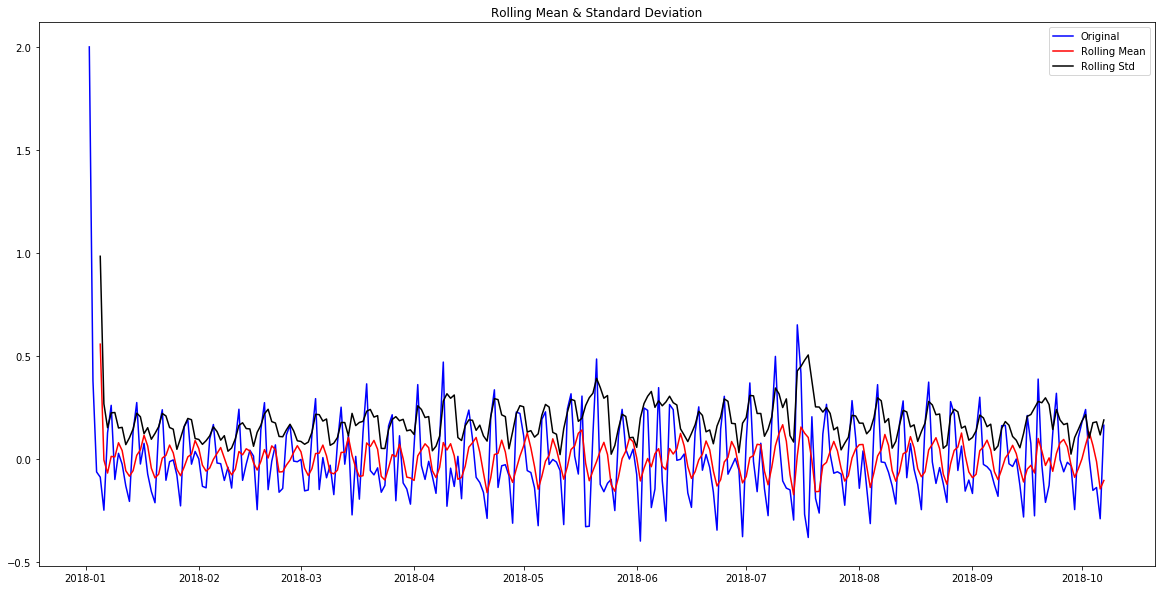

Results of Dickey-Fuller Test:
Test Statistic                -6.994832e+00
p-value                        7.580705e-10
#Lags Used                     1.300000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64


In [47]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

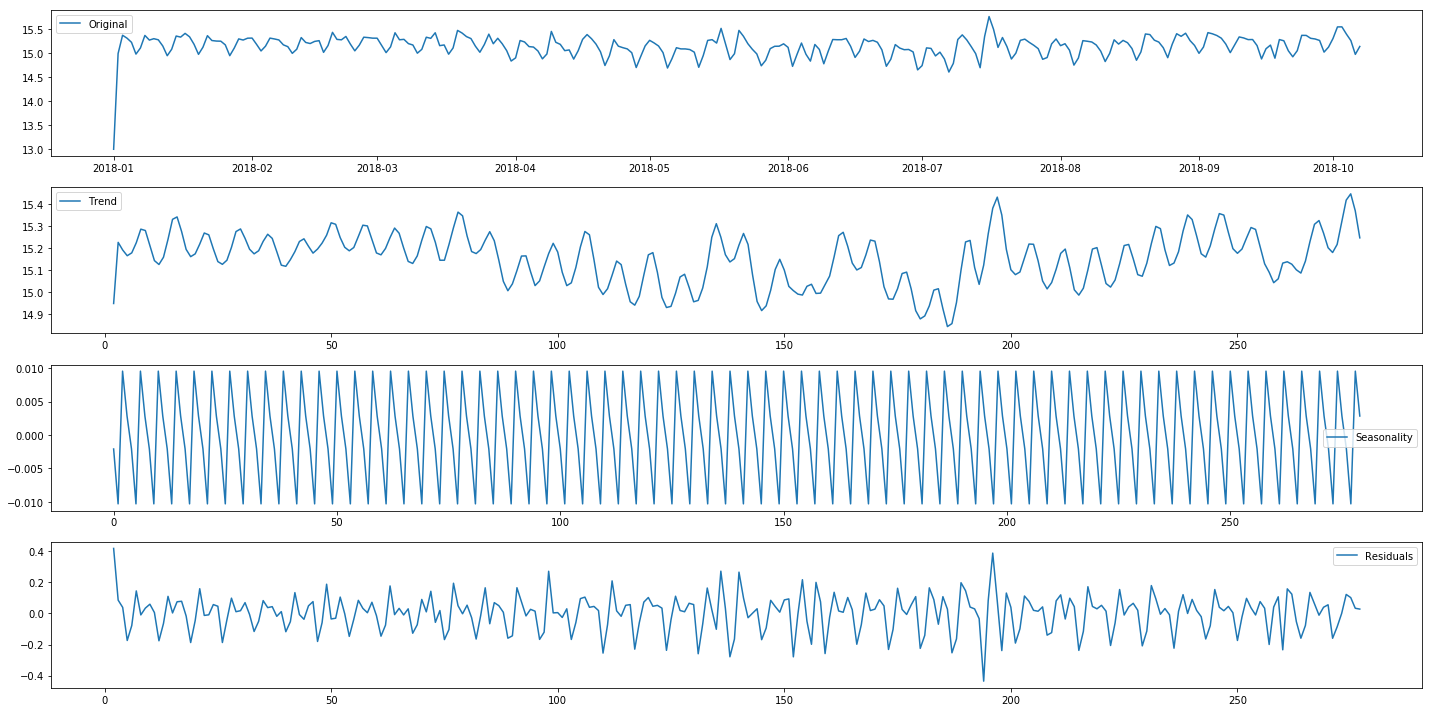

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Revenue.values, freq = 4) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


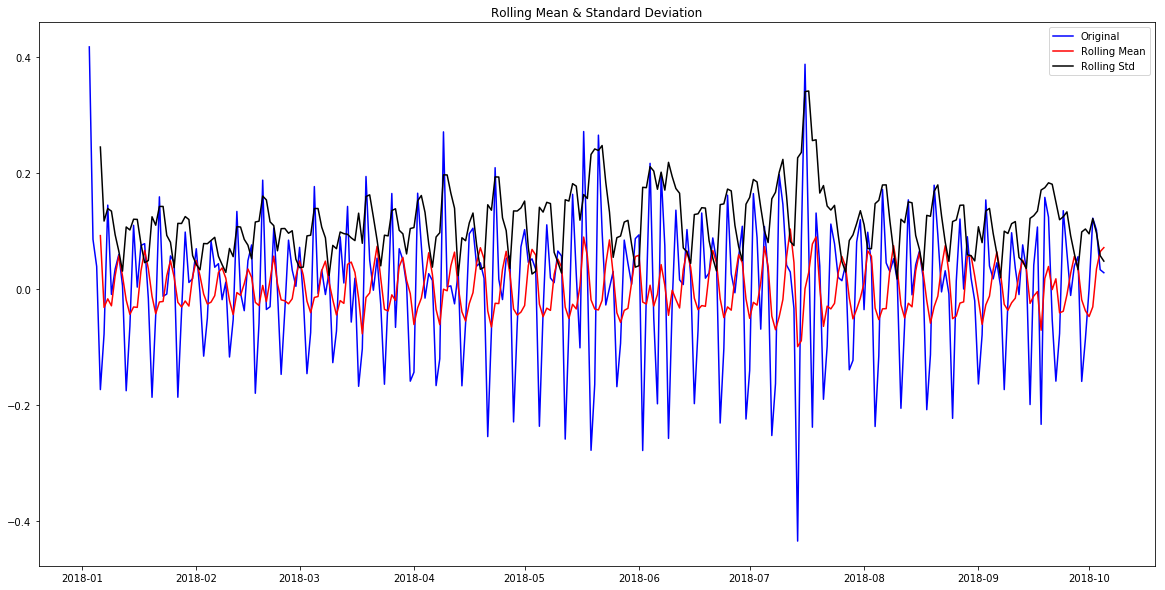

Results of Dickey-Fuller Test:
Test Statistic                -7.700498e+00
p-value                        1.343342e-11
#Lags Used                     1.500000e+01
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64


In [49]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [54]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=4) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=4, method='ols')

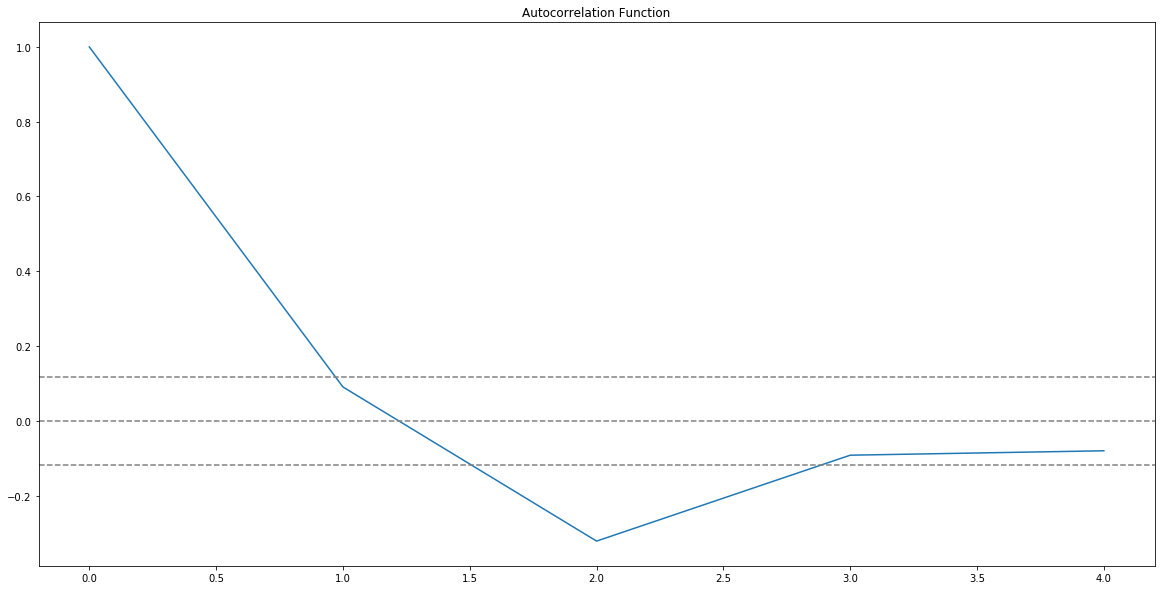

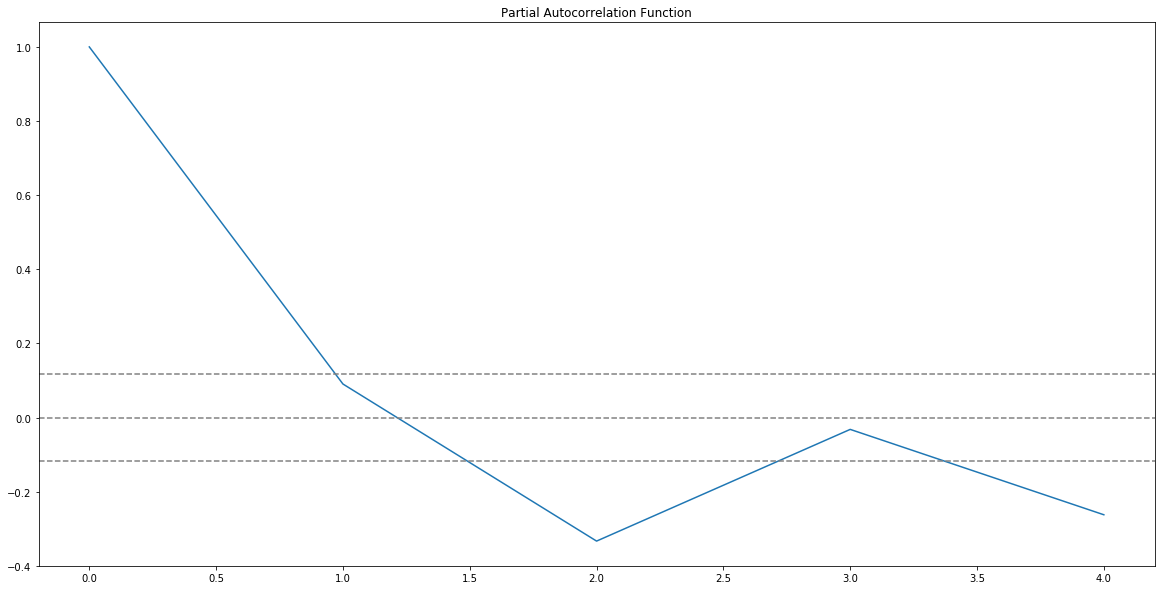

In [55]:
#ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [56]:
Train_log

Date
2018-01-01    12.993677
2018-01-02    14.994924
2018-01-03    15.376658
2018-01-04    15.315592
2018-01-05    15.229160
2018-01-06    14.982552
2018-01-07    15.111161
2018-01-08    15.373285
2018-01-09    15.275848
2018-01-10    15.305069
2018-01-11    15.281665
2018-01-12    15.153019
2018-01-13    14.948987
2018-01-14    15.084924
2018-01-15    15.360561
2018-01-16    15.338009
2018-01-17    15.415901
2018-01-18    15.344304
2018-01-19    15.188533
2018-01-20    14.978138
2018-01-21    15.127401
2018-01-22    15.368166
2018-01-23    15.266684
2018-01-24    15.255549
2018-01-25    15.252801
2018-01-26    15.175848
2018-01-27    14.950147
2018-01-28    15.108282
2018-01-29    15.300543
2018-01-30    15.277206
                ...    
2018-09-08    15.013503
2018-09-09    15.176726
2018-09-10    15.341829
2018-09-11    15.320444
2018-09-12    15.285950
2018-09-13    15.287613
2018-09-14    15.161274
2018-09-15    14.881661
2018-09-16    15.094562
2018-09-17    15.171308
2018-09-18 

In [69]:
# from statsmodels.tsa.arima_model import ARIMA

# model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
# results_AR = model.fit(disp=-1)  
# plt.plot(train_log_diff.dropna(), label='original') 
# plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
# plt.legend(loc='best') 
# plt.show()

In [77]:
# AR_predict=results_AR.predict(start="2018-01-01", end="2018-10-07") 
# #AR_predict=results_AR.predict()
# AR_predict=AR_predict.cumsum().shift().fillna(0) 
# AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Revenue'])[0], index = valid.index) 
# AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
# AR_predict = np.exp(AR_predict1)
# plt.plot(valid['Revenue'], label = "Valid") 
# plt.plot(AR_predict, color = 'red', label = "Predict") 
# plt.legend(loc= 'best') 
# plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Revenue']))/valid.shape[0])) 
# plt.show()

/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/sulbha/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


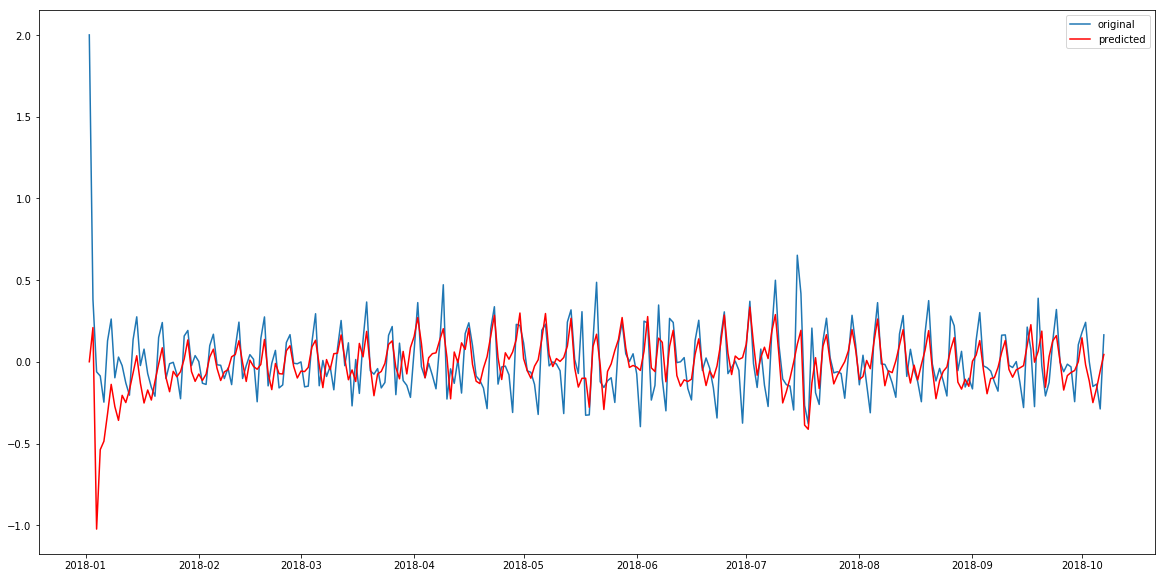

In [78]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [87]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Revenue'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Revenue'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Revenue']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Revenue'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Revenue']))/given_set.shape[0]))
    plt.show()

In [88]:
Train_log

Date
2018-01-01    12.993677
2018-01-02    14.994924
2018-01-03    15.376658
2018-01-04    15.315592
2018-01-05    15.229160
2018-01-06    14.982552
2018-01-07    15.111161
2018-01-08    15.373285
2018-01-09    15.275848
2018-01-10    15.305069
2018-01-11    15.281665
2018-01-12    15.153019
2018-01-13    14.948987
2018-01-14    15.084924
2018-01-15    15.360561
2018-01-16    15.338009
2018-01-17    15.415901
2018-01-18    15.344304
2018-01-19    15.188533
2018-01-20    14.978138
2018-01-21    15.127401
2018-01-22    15.368166
2018-01-23    15.266684
2018-01-24    15.255549
2018-01-25    15.252801
2018-01-26    15.175848
2018-01-27    14.950147
2018-01-28    15.108282
2018-01-29    15.300543
2018-01-30    15.277206
                ...    
2018-09-08    15.013503
2018-09-09    15.176726
2018-09-10    15.341829
2018-09-11    15.320444
2018-09-12    15.285950
2018-09-13    15.287613
2018-09-14    15.161274
2018-09-15    14.881661
2018-09-16    15.094562
2018-09-17    15.171308
2018-09-18 

In [107]:
 typeof(Train_log.index[0])

NameError: name 'typeof' is not defined

In [104]:
# from pandas import datetime

# startindex =  datetime.strptime('2018-01-07', '%Y-%m-%d').date()
# s = datetime.combine(startindex ,datetime.time(datetime.now()))
# s
#startindex = pd.to_datetime('2018-01-01').date()
#startindex
ARIMA_predict_diff=results_ARIMA.predict( start= '2018-01-01')
#check_prediction_diff(ARIMA_predict_diff, valid)

KeyError: '2018-01-01'

In [151]:
# build SARIMAX model: select the parameters (p,q,d,s)

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [63]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_weekly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:2006.2639079767882
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1844.543255656013
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:1768.960364610306
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:1631.2813414596149
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:1799.408748673454
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:1760.000262933367
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:1666.9503756628592
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:1633.2130638473946
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1938.7423832682605
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:1800.6591548929134
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:1735.2677964835777
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:1598.100023724196
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:1859.4159398089614
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:1794.9753410217327
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:1664.7791644440274
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:1599.970560415642
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:1842.8428271971247
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:1724.3428868234519
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC

In [183]:
df_weekly

Revenue
Date                    
2018-01-07  3.416458e+06
2018-01-14  4.042583e+06
2018-01-21  4.242602e+06
2018-01-28  4.010381e+06
2018-02-04  4.123846e+06
2018-02-11  3.957023e+06
2018-02-18  4.039273e+06
2018-02-25  4.241056e+06
2018-03-04  4.139874e+06
2018-03-11  4.063314e+06
2018-03-18  4.093007e+06
2018-03-25  4.343473e+06
2018-04-01  3.790731e+06
2018-04-08  3.636395e+06
2018-04-15  3.787724e+06
2018-04-22  3.800886e+06
2018-04-29  3.455209e+06
2018-05-06  3.514143e+06
2018-05-13  3.323980e+06
2018-05-20  4.035651e+06
2018-05-27  3.722500e+06
2018-06-03  3.505777e+06
2018-06-10  3.364892e+06
2018-06-17  3.956195e+06
2018-06-24  3.697008e+06
2018-07-01  3.261130e+06
2018-07-08  3.068107e+06
2018-07-15  3.936644e+06
2018-07-22  4.375262e+06
2018-07-29  3.732302e+06
2018-08-05  3.602261e+06
2018-08-12  3.702452e+06
2018-08-19  3.778461e+06
2018-08-26  4.108788e+06
2018-09-02  4.236442e+06
2018-09-09  4.335128e+06
2018-09-16  4.021875e+06
2018-09-23  3.623730e+06
2018-09-30  4.247075e+06
2018-10-07  4.559877e+06
2018-10-14  4.168954e+06
2018-10-21  4.113868e+06
2018-10-28  4.340838e+06
2018-11-04  4.349239e+06

In [184]:
#ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1111.4128994880725
#ARIMA(1, 1, 1)x(0, 1, 1, 4)4 - AIC:1580.0578567992804
    
mod = sm.tsa.statespace.SARIMAX(df_weekly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4225      0.463      0.912      0.362      -0.485       1.330
ma.L1         -0.7017      0.348     -2.014      0.044      -1.385      -0.019
ar.S.L4       -0.6656      0.326     -2.042      0.041      -1.304      -0.027
ma.S.L4        0.3391      0.418      0.812      0.417      -0.480       1.158
sigma2      1.267e+11   1.52e-12   8.33e+22      0.000    1.27e+11    1.27e+11


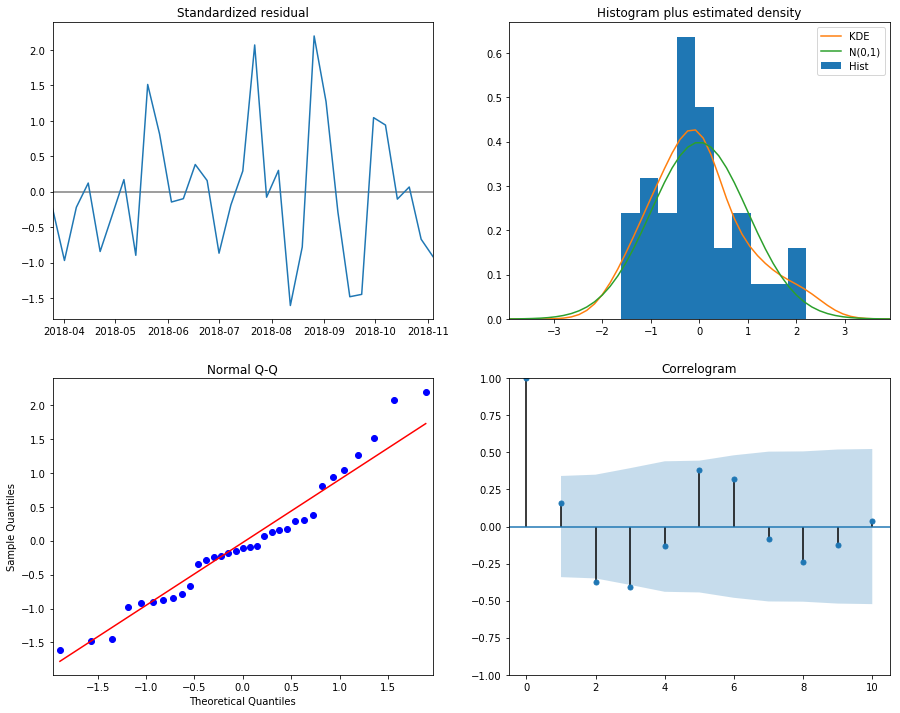

In [185]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [186]:
pred = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=False)
pred_ci = pred.conf_int()


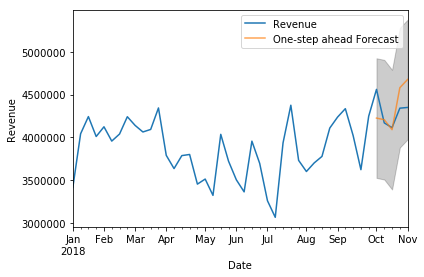

In [187]:
ax = df_weekly.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [188]:
y_forecasted = pred.predicted_mean
y_truth = df_weekly_sum['2018-10-07':]

In [189]:
list(y_forecasted.values)

[4225184.5260641389,
 4206366.1425178591,
 4090328.4497530023,
 4579670.3038113164,
 4675640.1645344496]

In [190]:
y = pd.DataFrame( (y_forecasted.values))
y.index = y_forecasted.index
y.columns = ['Revenue']
y.info()
#y['Date'] = pd.todatetime(y['Date'])
#y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-10-07 to 2018-11-04
Freq: W-SUN
Data columns (total 1 columns):
Revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [191]:
y_truth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-10-07 to 2018-11-04
Freq: W-SUN
Data columns (total 1 columns):
Revenue    5 non-null float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [192]:
print (y_forecasted)
print (y_truth['Revenue'])

Date
2018-10-07    4.225185e+06
2018-10-14    4.206366e+06
2018-10-21    4.090328e+06
2018-10-28    4.579670e+06
2018-11-04    4.675640e+06
Freq: W-SUN, dtype: float64
Date
2018-10-07    31919135.66
2018-10-14    29182677.95
2018-10-21    28797072.50
2018-10-28    30385865.26
2018-11-04    13047717.03
Freq: W-SUN, Name: Revenue, dtype: float64


In [193]:
error = y_forecasted - y_truth['Revenue']

In [194]:
error

Date
2018-10-07   -2.769395e+07
2018-10-14   -2.497631e+07
2018-10-21   -2.470674e+07
2018-10-28   -2.580619e+07
2018-11-04   -8.372077e+06
Freq: W-SUN, dtype: float64

In [195]:
# Compute the mean square error
mse = (error ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 547449130327179.3


In [199]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-10-07'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [200]:
pred_dynamic_ci

lower Revenue  upper Revenue
Date                                    
2018-10-07   3.527614e+06   4.922755e+06
2018-10-14   3.105271e+06   4.825011e+06
2018-10-21   2.958388e+06   4.872721e+06
2018-10-28   3.368243e+06   5.432154e+06
2018-11-04   3.119762e+06   5.781975e+06

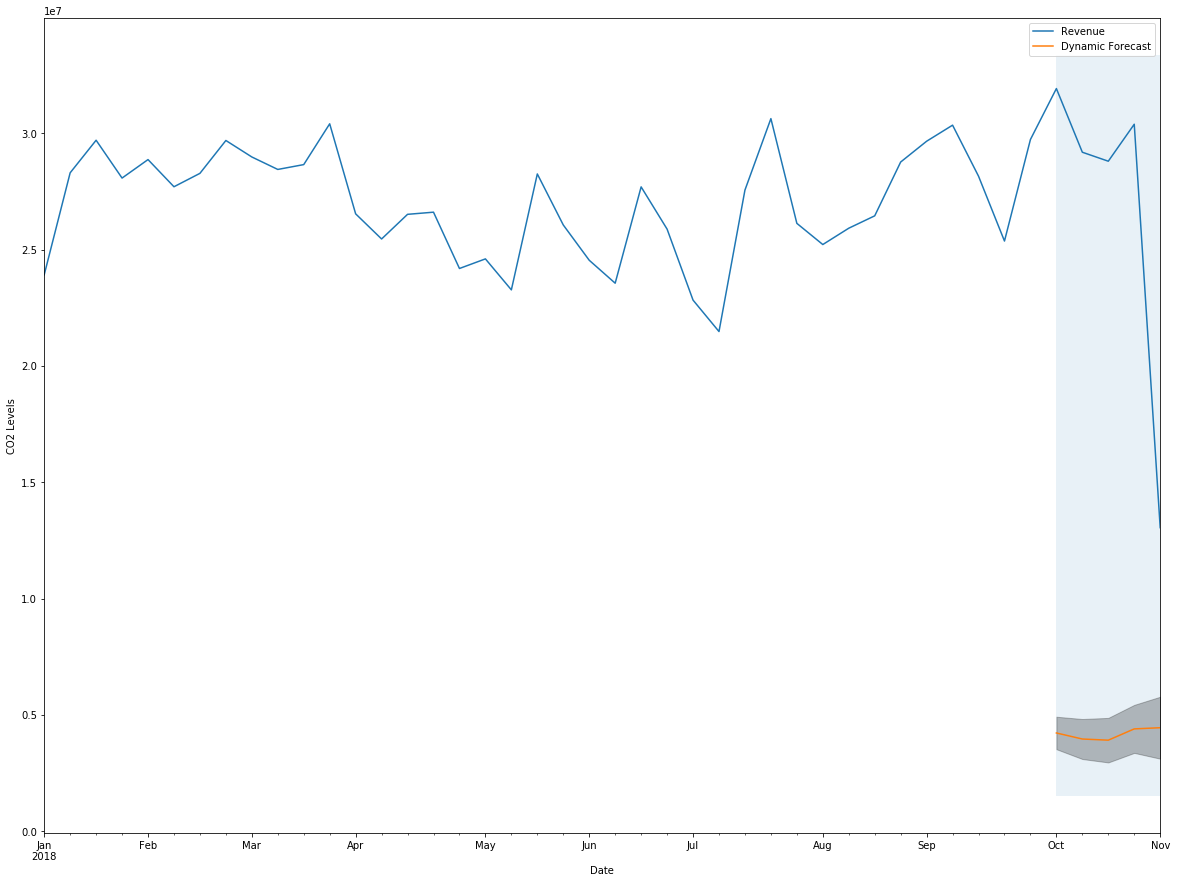

In [201]:
ax = df_weekly_sum.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-10-07'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [202]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

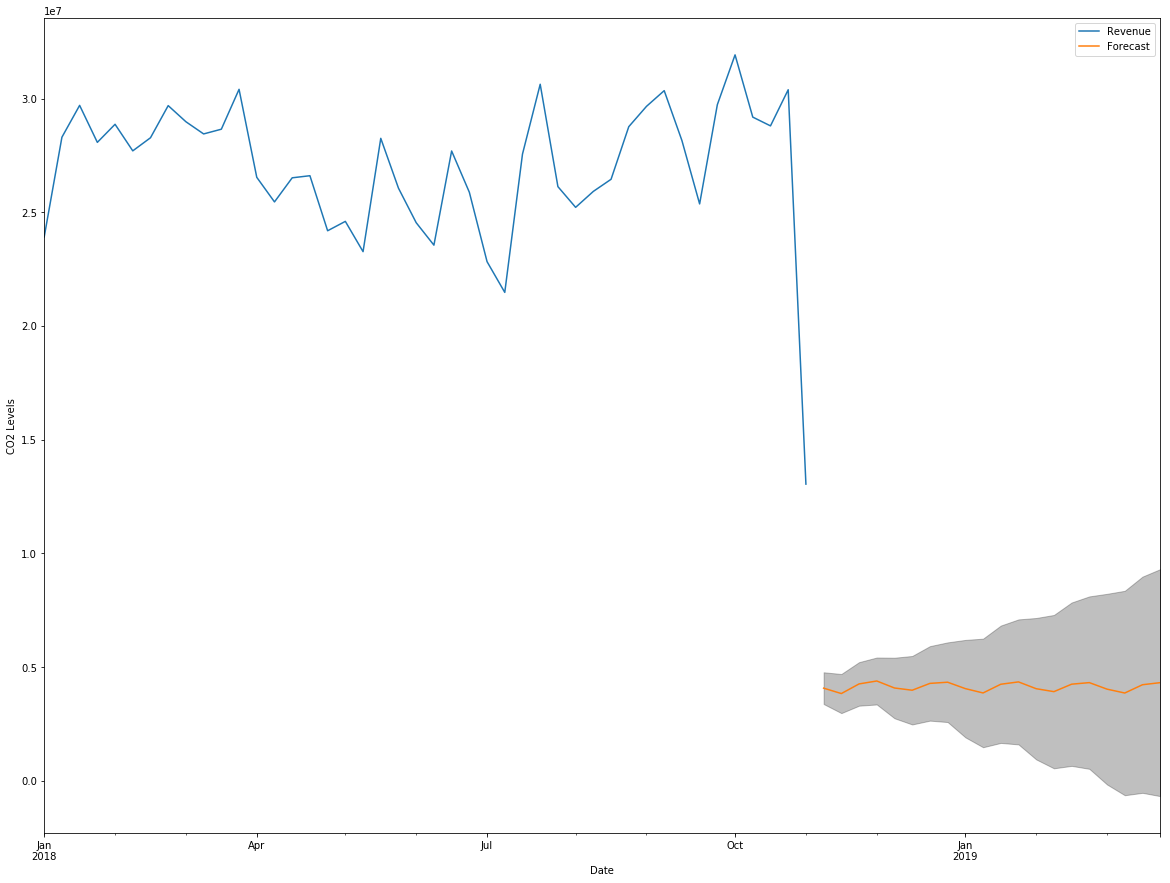

In [203]:
ax = df_weekly_sum.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()